Comprehensive Strength explains the capacity of the concrete to withstand loads before failure.

Comprehensive strength of cement concrete is an important property of the mixture that helps in its durability and 

support for use case, as the most important strength test.

It is a complex formula of relationship between age (number of days) and other factors, hence it gives an idea about the
characteristics of the concrete.

The importance of comprehensive strength is that it ensures the overall quality of the finished product.

The ability to predict this characteristics of the concrete can help the company maximize profit and 
minimize cost as this can lead to knowing the outcome of production, even before the production begins. 

This project is self-inspired and an attempt to understand the Keras library holistically.

by Blibo Albert @bliboalbert <<-github/LinkedIn

In [1]:
# import libraries
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# preparing data processing pipeline
data = pd.read_csv('concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [41]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [42]:
# data looks neat - proceed with preprocessing
X = data.drop(columns='Strength') # extract feature matrix
y = data['Strength'] # extract response vector


In [43]:
# standardize and normalize dataset for fast convergence
scaler = StandardScaler()
X = scaler.fit_transform(X) # makes mean and std 0 and 1 respectively
X = normalize(X) # transforms datasets between 0 and 1

In [44]:
X[:5]

array([[ 0.74296401, -0.25692443, -0.25400286, -0.27487746, -0.18603173,
         0.2588033 , -0.36509932, -0.0838736 ],
       [ 0.73089305, -0.25275017, -0.24987606, -0.27041152, -0.18300926,
         0.3115293 , -0.35916754, -0.0825109 ],
       [ 0.09764723,  0.15807276, -0.16832925,  0.43226865, -0.20647983,
        -0.1046201 , -0.44527486,  0.7060015 ],
       [ 0.079424  ,  0.12857274, -0.13691513,  0.35159736, -0.16794593,
        -0.08509558, -0.36217631,  0.81742012],
       [-0.14850613,  0.12745477, -0.15915576,  0.09183112, -0.19522723,
         0.01325009,  0.12172013,  0.9353249 ]])

In [45]:
# split datasets into train and test examples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=100)
Feature_train_shape = X_train.shape
Feature_test_shape = X_test.shape
Target_train_shape = y_train.shape
Target_test_shape = y_test.shape
print('Feature dimensions: Test shape{} and Train shape{}'.format(Feature_test_shape,Feature_train_shape))
print('Target dimensions: Test shape{} and Train shape{}'.format(Target_test_shape,Target_train_shape))

Feature dimensions: Test shape(206, 8) and Train shape(824, 8)
Target dimensions: Test shape(206,) and Train shape(824,)


In [46]:
n_cols = X_train.shape[1]

Data processing pipeline is ready.

Now we create and train regression model using the keras library for deep learning

In [47]:
# build model
def regression_model():
    model = Sequential() # use the sequential api to build model
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics='mse')
    return model


In [48]:
# train model
model = regression_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, verbose=1) # train model with 400 iterations

Epoch 1/400
26/26 [==============================] - 6s 23ms/step - loss: 1551.3423 - mse: 1551.3423 - val_loss: 1522.2455 - val_mse: 1522.2455
Epoch 2/400
26/26 [==============================] - 0s 8ms/step - loss: 1533.9648 - mse: 1533.9648 - val_loss: 1501.4418 - val_mse: 1501.4418
Epoch 3/400
26/26 [==============================] - 0s 4ms/step - loss: 1506.5254 - mse: 1506.5254 - val_loss: 1466.7163 - val_mse: 1466.7163
Epoch 4/400
26/26 [==============================] - 0s 3ms/step - loss: 1463.0975 - mse: 1463.0975 - val_loss: 1413.1121 - val_mse: 1413.1121
Epoch 5/400
26/26 [==============================] - 0s 7ms/step - loss: 1397.9340 - mse: 1397.9340 - val_loss: 1333.9275 - val_mse: 1333.9275
Epoch 6/400
26/26 [==============================] - 0s 4ms/step - loss: 1301.8848 - mse: 1301.8848 - val_loss: 1218.3018 - val_mse: 1218.3018
Epoch 7/400
26/26 [==============================] - 0s 3ms/step - loss: 1165.8491 - mse: 1165.8491 - val_loss: 1056.9567 - val_mse: 1056.956

26/26 [==============================] - 0s 3ms/step - loss: 85.6131 - mse: 85.6131 - val_loss: 89.7302 - val_mse: 89.7302
Epoch 61/400
26/26 [==============================] - 0s 3ms/step - loss: 85.1773 - mse: 85.1773 - val_loss: 89.1735 - val_mse: 89.1735
Epoch 62/400
26/26 [==============================] - 0s 3ms/step - loss: 84.5926 - mse: 84.5926 - val_loss: 88.9138 - val_mse: 88.9138
Epoch 63/400
26/26 [==============================] - 0s 3ms/step - loss: 84.2323 - mse: 84.2323 - val_loss: 88.3519 - val_mse: 88.3519
Epoch 64/400
26/26 [==============================] - 0s 2ms/step - loss: 83.5646 - mse: 83.5646 - val_loss: 88.0376 - val_mse: 88.0376
Epoch 65/400
26/26 [==============================] - 0s 3ms/step - loss: 83.4277 - mse: 83.4277 - val_loss: 87.8820 - val_mse: 87.8820
Epoch 66/400
26/26 [==============================] - 0s 3ms/step - loss: 82.7724 - mse: 82.7724 - val_loss: 87.0095 - val_mse: 87.0095
Epoch 67/400
26/26 [==============================] - 0s 3ms/

26/26 [==============================] - 0s 3ms/step - loss: 64.2706 - mse: 64.2706 - val_loss: 70.6868 - val_mse: 70.6868
Epoch 121/400
26/26 [==============================] - 0s 3ms/step - loss: 64.0967 - mse: 64.0967 - val_loss: 70.7138 - val_mse: 70.7138
Epoch 122/400
26/26 [==============================] - 0s 3ms/step - loss: 64.2145 - mse: 64.2145 - val_loss: 70.5676 - val_mse: 70.5676
Epoch 123/400
26/26 [==============================] - 0s 3ms/step - loss: 63.9556 - mse: 63.9556 - val_loss: 70.0181 - val_mse: 70.0181
Epoch 124/400
26/26 [==============================] - 0s 3ms/step - loss: 63.5781 - mse: 63.5781 - val_loss: 69.7344 - val_mse: 69.7344
Epoch 125/400
26/26 [==============================] - 0s 3ms/step - loss: 63.4084 - mse: 63.4084 - val_loss: 70.2603 - val_mse: 70.2603
Epoch 126/400
26/26 [==============================] - 0s 3ms/step - loss: 63.1387 - mse: 63.1387 - val_loss: 69.7203 - val_mse: 69.7203
Epoch 127/400
26/26 [==============================] - 

Epoch 180/400
26/26 [==============================] - 0s 3ms/step - loss: 54.4992 - mse: 54.4992 - val_loss: 61.6123 - val_mse: 61.6123
Epoch 181/400
26/26 [==============================] - 0s 3ms/step - loss: 54.4257 - mse: 54.4257 - val_loss: 62.1344 - val_mse: 62.1344
Epoch 182/400
26/26 [==============================] - 0s 3ms/step - loss: 54.5183 - mse: 54.5183 - val_loss: 62.0865 - val_mse: 62.0865
Epoch 183/400
26/26 [==============================] - 0s 3ms/step - loss: 54.1376 - mse: 54.1376 - val_loss: 61.3549 - val_mse: 61.3549
Epoch 184/400
26/26 [==============================] - 0s 3ms/step - loss: 54.0299 - mse: 54.0299 - val_loss: 61.5013 - val_mse: 61.5013
Epoch 185/400
26/26 [==============================] - 0s 3ms/step - loss: 53.8430 - mse: 53.8430 - val_loss: 61.2334 - val_mse: 61.2334
Epoch 186/400
26/26 [==============================] - 0s 3ms/step - loss: 53.7886 - mse: 53.7886 - val_loss: 61.1931 - val_mse: 61.1931
Epoch 187/400
26/26 [====================

Epoch 240/400
26/26 [==============================] - 0s 3ms/step - loss: 49.3180 - mse: 49.3180 - val_loss: 57.0782 - val_mse: 57.0782
Epoch 241/400
26/26 [==============================] - 0s 3ms/step - loss: 48.8850 - mse: 48.8850 - val_loss: 56.7442 - val_mse: 56.7442
Epoch 242/400
26/26 [==============================] - 0s 3ms/step - loss: 48.7348 - mse: 48.7348 - val_loss: 56.4594 - val_mse: 56.4594
Epoch 243/400
26/26 [==============================] - 0s 3ms/step - loss: 48.7507 - mse: 48.7507 - val_loss: 56.3705 - val_mse: 56.3705
Epoch 244/400
26/26 [==============================] - 0s 3ms/step - loss: 48.7391 - mse: 48.7391 - val_loss: 56.3160 - val_mse: 56.3160
Epoch 245/400
26/26 [==============================] - 0s 3ms/step - loss: 48.7100 - mse: 48.7100 - val_loss: 55.9878 - val_mse: 55.9878
Epoch 246/400
26/26 [==============================] - 0s 3ms/step - loss: 48.8197 - mse: 48.8197 - val_loss: 56.3319 - val_mse: 56.3319
Epoch 247/400
26/26 [====================

Epoch 300/400
26/26 [==============================] - 0s 4ms/step - loss: 44.8929 - mse: 44.8929 - val_loss: 52.0482 - val_mse: 52.0482
Epoch 301/400
26/26 [==============================] - 0s 3ms/step - loss: 44.6610 - mse: 44.6610 - val_loss: 52.0841 - val_mse: 52.0841
Epoch 302/400
26/26 [==============================] - 0s 3ms/step - loss: 44.9465 - mse: 44.9465 - val_loss: 52.4250 - val_mse: 52.4250
Epoch 303/400
26/26 [==============================] - 0s 3ms/step - loss: 44.7482 - mse: 44.7482 - val_loss: 52.4585 - val_mse: 52.4585
Epoch 304/400
26/26 [==============================] - 0s 3ms/step - loss: 44.4836 - mse: 44.4836 - val_loss: 52.2910 - val_mse: 52.2910
Epoch 305/400
26/26 [==============================] - 0s 3ms/step - loss: 44.6255 - mse: 44.6255 - val_loss: 51.9582 - val_mse: 51.9582
Epoch 306/400
26/26 [==============================] - 0s 3ms/step - loss: 44.4301 - mse: 44.4301 - val_loss: 52.5515 - val_mse: 52.5515
Epoch 307/400
26/26 [====================

Epoch 360/400
26/26 [==============================] - 0s 3ms/step - loss: 42.0738 - mse: 42.0738 - val_loss: 50.9492 - val_mse: 50.9492
Epoch 361/400
26/26 [==============================] - 0s 3ms/step - loss: 42.4268 - mse: 42.4268 - val_loss: 50.6465 - val_mse: 50.6465
Epoch 362/400
26/26 [==============================] - 0s 3ms/step - loss: 41.7421 - mse: 41.7421 - val_loss: 50.8191 - val_mse: 50.8191
Epoch 363/400
26/26 [==============================] - 0s 3ms/step - loss: 41.6387 - mse: 41.6387 - val_loss: 50.4396 - val_mse: 50.4396
Epoch 364/400
26/26 [==============================] - 0s 3ms/step - loss: 41.7371 - mse: 41.7371 - val_loss: 50.4767 - val_mse: 50.4767
Epoch 365/400
26/26 [==============================] - 0s 3ms/step - loss: 41.6369 - mse: 41.6369 - val_loss: 50.8517 - val_mse: 50.8517
Epoch 366/400
26/26 [==============================] - 0s 3ms/step - loss: 41.9120 - mse: 41.9120 - val_loss: 50.4347 - val_mse: 50.4347
Epoch 367/400
26/26 [====================

In [49]:
# evaluate model
prediction = model.predict(X_test)
prediction[:5]

7/7 [==============================] - 0s 3ms/step


array([[62.927254],
       [61.61619 ],
       [26.332455],
       [16.661922],
       [37.298584]], dtype=float32)

In [50]:
train_predict = model.predict(X_train)
train_predict[:5]

26/26 [==============================] - 0s 1ms/step


array([[50.88271 ],
       [56.852947],
       [46.858723],
       [17.35401 ],
       [32.85159 ]], dtype=float32)

In [51]:
# compare true and predicted target
evaluate_df = pd.DataFrame(y_test)
evaluate_df['Predicted_Strength'] = prediction
evaluate_df.head()

,Strength,Predicted_Strength
173,68.10,62.927254
134,71.30,61.616192
822,25.18,26.332455
264,19.52,16.661922
479,38.02,37.298584


column-wise Pearson correlation coefficients between variables in         prediction & y_test =
 [[1.         0.91462462]
 [0.91462462 1.        ]]
column-wise Pearson correlation coefficients between variables in         train_predict & y_train =
 [[1.         0.92440462]
 [0.92440462 1.        ]]


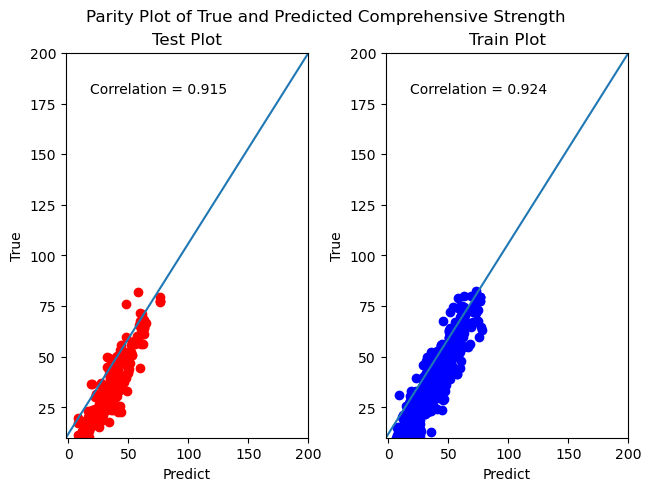

In [52]:
# draw a parity graph for predictions and true targets
xmin = -2.0 # reflects minimum limits of x_axis
xmax =200.0 # reflects maximum limits of x_axis
ymin = 10
ymax = 200

widths = [4,4]
heights = [4]

grid_space = dict(width_ratios = widths, height_ratios = heights)
fig, (ax1,ax2) = plt.subplots(1,2, constrained_layout=True)
fig.add_gridspec(nrows=1, ncols=2, width_ratios=widths,height_ratios=heights)
fig.suptitle('Parity Plot of True and Predicted Comprehensive Strength')
# test prediction plot
ax1.plot(prediction, y_test, 'ro', scalex=True, scaley=True)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
x1 = np.linspace(*ax1.get_xlim()) # generate 45-degree line
y1 = np.linspace(*ax1.get_ylim()) # generate 45-degree line
ax1.plot(x1, y1)
ax1.set_title('Test Plot')
ax1.set_xlabel("Predict")
ax1.set_ylabel("True")
# column-wise Pearson correlation coefficients between variables in test_y_predictions & test_y_actual
r2Value1 = np.corrcoef(prediction, y_test.to_numpy(),rowvar=False)
print('column-wise Pearson correlation coefficients between variables in \
        prediction & y_test =\n', r2Value1)
ax1.annotate('Correlation = %0.3f' % r2Value1[0][1], (xmin + ((xmax - xmin)/10), xmax - (xmax/10)))

#
# train prediction plot
ax2.plot(train_predict, y_train, 'bo', scalex=True, scaley=True)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
x2 = np.linspace(*ax2.get_xlim()) # generate 45-degree line
y2 = np.linspace(*ax2.get_ylim()) # generate 45-degree line
ax2.plot(x2, y2)
ax2.set_title('Train Plot')
ax2.set_xlabel("Predict")
ax2.set_ylabel("True")
# column-wise Pearson correlation coefficients between variables in test_y_predictions & test_y_actual
r2Value2 = np.corrcoef(train_predict, y_train.to_numpy(),rowvar=False)
print('column-wise Pearson correlation coefficients between variables in \
        train_predict & y_train =\n', r2Value2)
ax2.annotate('Correlation = %0.3f' % r2Value2[0][1], (xmin + ((xmax - xmin)/10), xmax - (xmax/10)))
fig.savefig('ParityPlots') # saves figure

In [53]:
# evaluate model
score = model.evaluate(X_test, y_test)
print('MSE Score of model is {0:.2f}'.format(score[0]))

7/7 [==============================] - 0s 3ms/step - loss: 49.1076 - mse: 49.1076
MSE Score of model is 49.11


In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                90        
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.save('comprehensive_strength,h5')

INFO:tensorflow:Assets written to: comprehensive_strength,h5\assets


INFO:tensorflow:Assets written to: comprehensive_strength,h5\assets


In [61]:
import math
std = math.sqrt(score[0])
print('Standard Deviation: {0:.2f}'.format(std))

Standard Deviation: 7.01


Conclusion on Training and Testing of Model

The train model is evaluated with Mean Squared Error of 49.11 and 7.01 standard deviation at 400 iterations on training.
This can be improved by either reprocessing the training data, as it can be observed that the target variable values were not 
normalize as did the feature variable values or by increasing the number of epochs.

The metrics of evaluation, mean squared error of 49.11 means that our predicted strength deviated from the true values by 49.11.
When can train the model to give a minimum mse, then our model will be considered to be more generalized.